# Support Vector Machine (SVM)

In [1]:
import warnings
warnings.filterwarnings('ignore') #忽略錯誤訊息

## features

In [2]:
import finlab.ml as ml

dataset = ml.fundamental_features()
dataset.tail()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利  T7211折舊  T0100流動資產  \
stock_id date                                                                  
9962     2021-05-15     8016.0    149610.0        6847.0   5027.0   699386.0   
         2021-08-14    40404.0   -155514.0       41534.0   4813.0   976044.0   
         2021-11-14    48861.0   -435827.0       42439.0   4855.0  1420059.0   
         2022-03-31    66532.0     74308.0       57469.0   4541.0  1413495.0   
         2022-05-15    44919.0    304147.0       39436.0   4397.0  1217003.0   

                     T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  R101_ROA稅後息前  \
stock_id date                                                                
9962     2021-05-15    76254.0          -3081.0       6607.0      0.618888   
         2021-08-14   274123.0          -2374.0      37397.0      3.243048   
         2021-11-14   671731.0          -4677.0      40088.0      2.691891   
         2022-03-31   581642.0          -8826.0      56074.0      3.352989   
         2022-05-15   352094.0          -1292.0      37016.0      2.371942   

                     R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率   R502_速動比率  \
stock_id date                      ...                                       
9962     2021-05-15      0.636208  ...    1.131801  917.179427  271.866394   
         2021-08-14      3.596651  ...    7.003658  356.060601  110.054975   
         2021-11-14      2.839898  ...   11.206472  211.402928   27.425413   
         2022-03-31      3.383973  ...   15.804715  243.018042   39.386083   
         2022-05-15      2.484802  ...   19.138403  345.647185   85.204235   

                     R503_利息支出率  R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  \
stock_id date                                                          
9962     2021-05-15    1.005915   623132.0      0.380922    0.726929   
         2021-08-14    0.178902   701921.0      0.594034    1.150951   
         2021-11-14    0.432543   748328.0      0.428734    0.649981   
         2022-03-31    1.907177   831853.0      0.503416    0.661852   
         2022-05-15    2.087938   864909.0      0.525429    0.758426   

                     R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                                                 
9962     2021-05-15       1.533102     0.435345      37994.0  
         2021-08-14       2.593983     0.710227     -34385.0  
         2021-11-14       2.435492     0.635698       2993.0  
         2022-03-31       3.250884     0.808212     -14303.0  
         2022-05-15       3.189613     0.753799       9429.0  

[5 rows x 48 columns]

In [3]:
from finlab.data import Data
data = Data()

pe = data.get("本益比")

In [4]:
rev = data.get("當月營收")
def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1

def delta_yoy(n):
    return (yoy(n)-yoy(n+1))

ml.add_feature(dataset, 'delta_yoy', delta_yoy(1))

In [5]:
ml.add_feature(dataset, '本益比', pe)
dataset.columns

Index(['T3395營業利益', 'T7210營運現金流', 'T3950歸屬母公司淨利', 'T7211折舊', 'T0100流動資產',
       'T1100流動負債', 'T7324取得不動產廠房及設備', 'T3970經常稅後淨利', 'R101_ROA稅後息前',
       'R11V_ROA綜合損益', 'R103_ROE稅後', 'R11U_ROE綜合損益', 'R145_稅前息前折舊前淨利率',
       'R105_營業毛利率', 'R106_營業利益率', 'R107_稅前淨利率', 'R108_稅後淨利率', 'R112_業外收支營收率',
       'R179_貝里比率', 'R203_研究發展費用率', 'R205_現金流量比率', 'R207_稅率', 'R304_每股營業額',
       'R305_每股營業利益', 'R303_每股現金流量', 'R306_每股稅前淨利', 'R314_每股綜合損益',
       'R316_每股稅後淨利', 'R504_總負債除總淨值', 'R505_負債比率', 'R506_淨值除資產', 'R401_營收成長率',
       'R402_營業毛利成長率', 'R403_營業利益成長率', 'R404_稅前淨利成長率', 'R405_稅後淨利成長率',
       'R406_經常利益成長率', 'R408_資產總額成長率', 'R409_淨值成長率', 'R501_流動比率', 'R502_速動比率',
       'R503_利息支出率', 'R678_營運資金', 'R607_總資產週轉次數', 'R610_存貨週轉率',
       'R612_固定資產週轉次數', 'R613_淨值週轉率次', 'R69B_自由現金流量', 'delta_yoy', '本益比'],
      dtype='object')

In [6]:
dataset.columns
TG_1 = '本益比'
TG_2 = 'delta_yoy'
features = [TG_1, TG_2] # ['R409_淨值成長率', 'R103_ROE稅後']
dataset = dataset[features].dropna(how='any')
dataset.tail(10)

本益比  delta_yoy
stock_id date                         
9962     2019-11-14  101.00  -0.300442
         2020-03-31   58.69   0.105082
         2020-05-15   72.73  -0.243422
         2020-11-14  909.00   0.548681
         2021-03-31  964.00   0.028844
         2021-05-15   43.96  -0.081728
         2021-08-14   29.39   1.142909
         2021-11-14   16.46   0.167626
         2022-03-31   13.32   0.073073
         2022-05-15    8.94   0.924530

## add prediction

In [7]:
ml.add_profit_prediction(dataset)
dataset.tail()

本益比  delta_yoy    return
stock_id date                                  
9962     2021-05-15  43.96  -0.081728  2.086820
         2021-08-14  29.39   1.142909  0.854637
         2021-11-14  16.46   0.167626  1.202346
         2022-03-31  13.32   0.073073  0.836585
         2022-05-15   8.94   0.924530       NaN

<AxesSubplot:xlabel='本益比', ylabel='delta_yoy'>

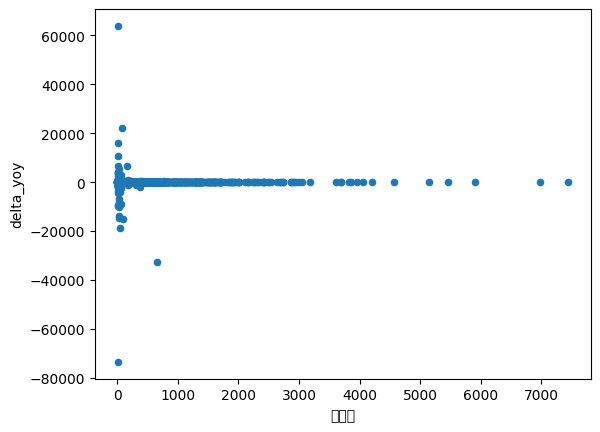

In [8]:


%matplotlib inline
dataset.plot.scatter(features[0], features[1])

#plot.rcparams['font.sans-serif']=['SimHei'] #设置字体为黑体,解决Matplotlib中文乱码问题
#plot.rcParams[' axes.unicode_minus']-False # 解决Matplotlib坐标轴负号·显示为方块的问题

## remove outliers

<AxesSubplot:>

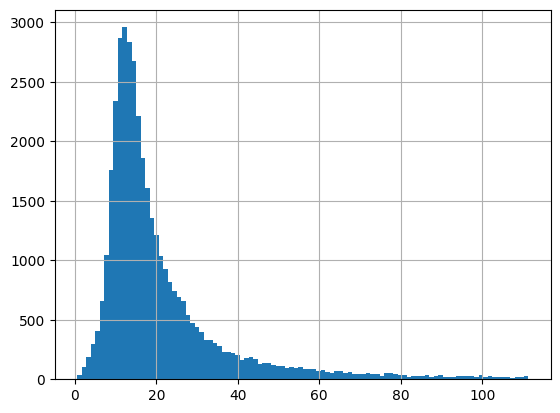

In [9]:
def is_valid(feature, nstd):
    ub = feature.mean() + nstd * feature.std()
    lb = feature.mean() - nstd * feature.std()

    return (feature > lb) & (feature <ub)

#valid =  is_valid(dataset[TG_2],10000000000)
valid = is_valid(dataset[TG_1], 0.5) & is_valid(dataset[TG_2],0.006)

dataset_rmoutliers = dataset[valid].dropna()


#dataset_rmoutliers.plot.scatter(features[0], features[1])

dataset_rmoutliers[TG_1].hist(bins=100)
#dataset_rmoutliers['R402_營業毛利成長率'].hist(bins=100)

## Scale features

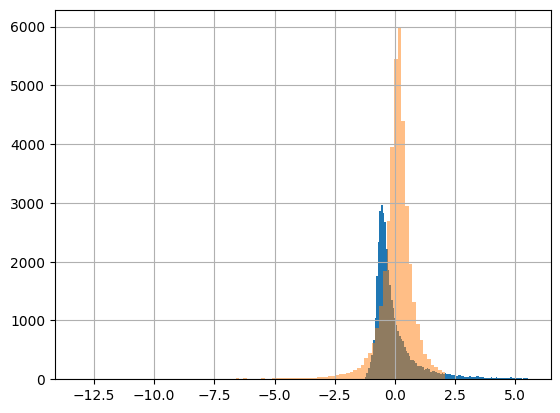

In [10]:
import pandas as pd
import sklearn.preprocessing as preprocessing

dataset_scaled = pd.DataFrame(preprocessing.scale(dataset_rmoutliers), index=dataset_rmoutliers.index, columns=dataset_rmoutliers.columns)
dataset_scaled.head()

dataset_scaled[TG_1].hist(bins=100)
dataset_scaled[TG_2].hist(bins=100, alpha=0.5)
dataset_scaled['return'] = dataset_rmoutliers['return']


## Training

In [16]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset_scaled, test_size=0.1, random_state=0)

from sklearn.svm import SVC

cf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto',
     kernel='linear', # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
     max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False)

cf.fit(dataset_train[features], dataset_train['return'] > dataset_train['return'].quantile(0.5))

SVC(gamma='auto', kernel='linear')

In [ ]:
cf.score(dataset_train[features], dataset_train['return'] > dataset_train['return'].quantile(0.5))
# 這個function不會讓它學習，看看學習分數

In [ ]:
from mlxtend.plotting import plot_decision_regions

features_plot = dataset_test[features].values
labels_plot = (dataset_test['return'] > dataset_test['return'].quantile(0.5)).astype(int).values

plot_decision_regions(features_plot, labels_plot, cf)

In [ ]:
features

## backtest 回測

In [ ]:
history = dataset_test.copy()
history['svm prediction'] = cf.predict(dataset_test[features])
history = history.reset_index()

dates = sorted(list(set(history['date'])))

seasonal_returns1 = []
seasonal_returns2 = []
for date in dates:
    current_stocks = history[history['date'] == date]
    buy_stocks = current_stocks[current_stocks['svm prediction'] == True]
    sell_stocks = current_stocks[current_stocks['svm prediction'] == False]
    
    seasonal_return1 = buy_stocks['return'].mean()    #我們想買的股票報酬率，複利   buy_stocks
    seasonal_returns1.append(seasonal_return1)
    
    seasonal_return2 = sell_stocks['return'].mean()    #我們不想買的股票報酬率
    seasonal_returns2.append(seasonal_return2)

import matplotlib.pyplot as plt
plt.style.use("ggplot")

pd.Series(seasonal_returns1, index=dates).cumprod().plot(color='red')
pd.Series(seasonal_returns2, index=dates).cumprod().plot(color='blue')